### TSNE ( t-Distributed Stochastic Neighbor Embedding ) 
TSNE is a dimension reduction technique that preserves local distances.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from openTSNE import TSNE

#### To replicate the process, run the notebook from here. 
This notebook relies on the first two steps outlined in the README (Hint: 1. Download Data, 2. Run load.py)

In [4]:
df = pd.read_csv('../data/full_labels_df.csv', error_bad_lines=False)

In [3]:
loaded = np.load('../data/full_image_arr.npz')

In [4]:
bw_img = loaded['b']

In [5]:
### Normalize -- For every number in array, subtract minimum value (0) 
# and divide by maximum value (255)
### Not strictly necessary when all data on same scale, but good practice
bw_img = bw_img/255

In [13]:
tsne = TSNE(n_components=2, n_iter=1000, perplexity=100)

In [ ]:
tsne_arr = tsne.fit(bw_img)

In [8]:
### Saving is optional. Saves time if you want to reuse. 
np.save('tsne_full.npy', tsne_arr)

#### To plot results without running TSNE, run the notebook from here. 
If you started from the beginning, skip the next cell!

In [27]:
### Reminder : If you started from the beginning, skip THIS
tsne_arr = np.load('tsne_full.npy')

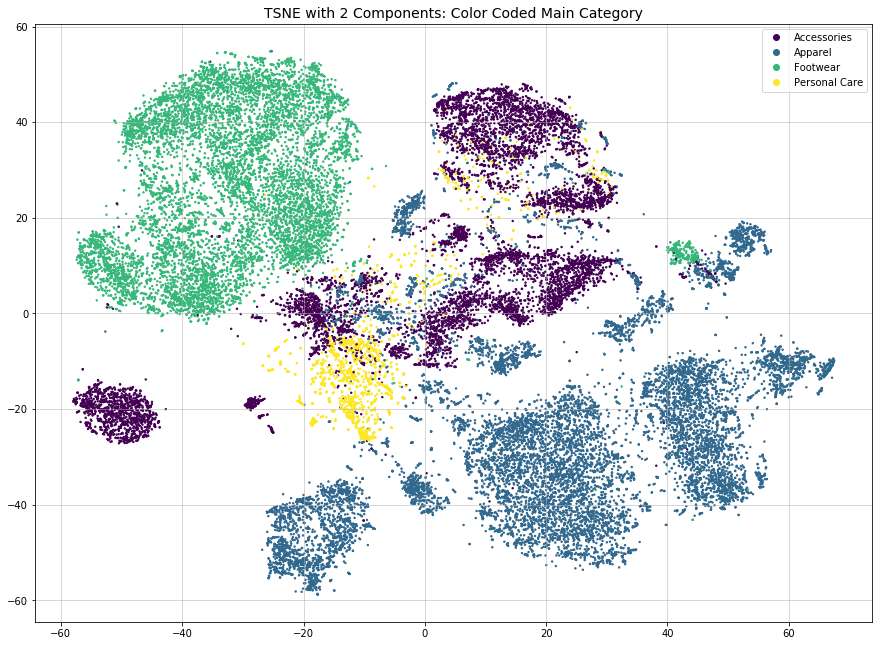

In [26]:
masterCat_codes = {'Accessories':0,'Apparel':1, 'Footwear':2, 'Personal Care':3}
df['colors'] = df['masterCategory'].apply(lambda x: masterCat_codes[x])
fig, ax = plt.subplots(figsize=(15,11))
scatter = ax.scatter(tsne_arr[:,0],tsne_arr[:,1], s=2, c= df['colors'], label= df['masterCategory']);

ax.set_title('TSNE with 2 Components: Color Coded Main Category', fontsize=14)
ax.grid(which='both', axis='both', linewidth=.5)
ax.legend(handles=scatter.legend_elements(num=[0,1,2,3])[0], labels=masterCat_codes.keys())
plt.show()